### DECISION TREES

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.preprocessing import StandardScaler


#### CLASSIFIER

In [2]:
#prepare the dataset

X = load_breast_cancer(as_frame=True)['data']
y = load_breast_cancer()['target']

In [ ]:
# split the dataset


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=23, stratify=y)

In [4]:
# scale the Xs

column_names = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data = X_train, columns=column_names)
X_test = pd.DataFrame(data=X_test, columns=column_names)


X_test.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.657610,0.331693,-1.574982,-1.257215,-0.136137,0.550433,0.559482,-0.671281,1.503215,3.015444,...,-1.459280,0.642880,-1.439467,-1.076532,1.398463,1.140422,1.308763,-0.506880,0.668476,3.690105
1,-0.534954,-0.300302,-0.562778,-0.552005,-0.678682,-0.670250,-0.597219,-0.629606,0.599224,-0.024812,...,-0.552348,-0.075139,-0.608819,-0.549314,-0.437362,-0.434709,-0.342972,-0.456989,0.342707,-0.099117
2,-1.357938,-1.225395,-1.304116,-1.108967,2.973922,0.397153,-0.665815,-0.606595,1.413533,2.170513,...,-1.161271,-1.252690,-1.155206,-0.947746,2.376384,-0.241721,-0.796214,-0.599600,1.228052,0.379605
3,-0.576730,-0.350678,-0.570876,-0.590786,0.503213,-0.080314,-0.485829,-0.375210,0.480845,-0.125007,...,-0.558397,0.017405,-0.558433,-0.557195,0.518334,-0.444077,-0.506320,-0.749273,0.242950,-0.691042
4,-1.531726,-1.099454,-1.528420,-1.193130,-0.329026,-1.130665,-1.079126,-1.225584,-0.290417,0.716933,...,-1.425003,-1.380338,-1.431312,-1.060769,-0.681842,-1.110667,-1.276457,-1.690893,-0.469379,-0.259066


In [23]:
model = DecisionTreeClassifier(random_state=23, max_depth=4, criterion='log_loss')
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [24]:
print(f'Train score: {f1_score(y_train, train_preds)}')
print(f'test score: {f1_score(y_test, test_preds)}')

Train score: 0.9962406015037594
test score: 0.9257142857142857


Text(0.5, 1.0, 'Test')

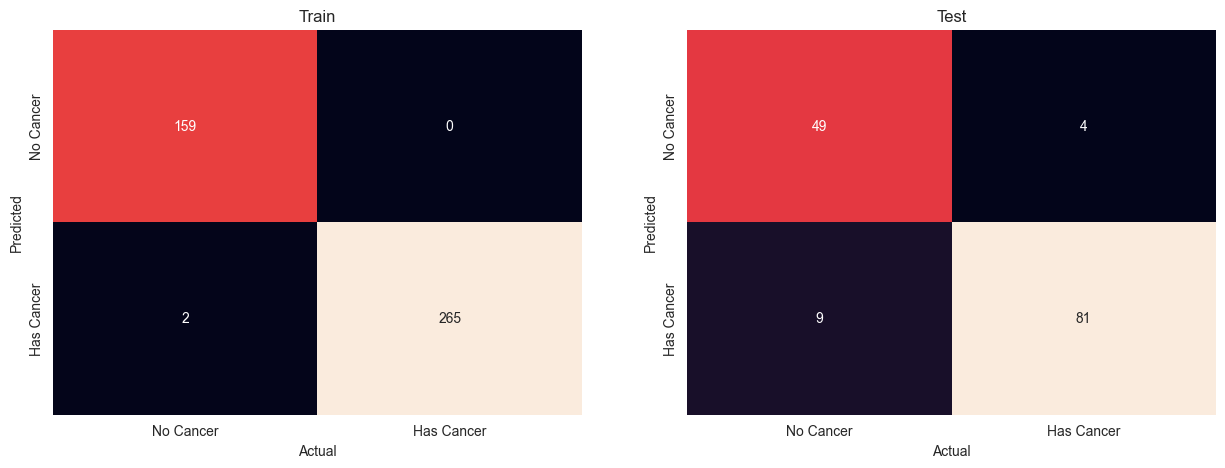

In [25]:
# confusion matrix

cols = ['No Cancer', 'Has Cancer']
train_conf = pd.DataFrame(data = confusion_matrix(y_train, train_preds), columns= cols, index=cols)
test_conf = pd.DataFrame(data = confusion_matrix(y_test, test_preds), columns= cols, index=cols)

sns.set_style('darkgrid')
sns.set_palette('bright')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.heatmap(data=train_conf, ax=axes[0], cbar=False, annot=True, fmt='d')
sns.heatmap(data=test_conf, ax=axes[1], cbar=False, annot=True, fmt='d')

axes[0].set_ylabel('Predicted')
axes[0].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_xlabel('Actual')
axes[0].set_title('Train')
axes[1].set_title('Test')

#### REGRESSION

In [27]:
# split the dataset

X = load_diabetes(as_frame=True)['data']
y = load_diabetes()['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=23)

In [28]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [36]:
model = DecisionTreeRegressor(random_state=23, max_depth=3)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [37]:
print(f'Train rmse: {root_mean_squared_error(y_train, train_preds)}')
print(f'test rmse: {root_mean_squared_error(y_test, test_preds)}')

Train rmse: 52.060188986027626
test rmse: 68.50200600503788
